In [ ]:
!git clone https://github.com/Gio99c/Causal-Discovery-Algorithms-on-Medical-Data.git

fatal: destination path 'Causal-Discovery-Algorithms-on-Medical-Data' already exists and is not an empty directory.


In [ ]:
pip install cdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 921 kB 19.1 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=45da18c7b3d1979871eb5bbc50a45f6a548004605a71c76aa0e4c3dff5d485c8
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=2824a60cc1733f4d631c3bcea2254d10d7a44996a599989460ae84d2ef87d6c8
  Stored in directory: /root/.cache/pip/wheels/1e/93/22/f83048fc1dafedcec44bb4ccf8d08225da96d20115d97a7a77
Successfully built GPUtil skrebate


In [104]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=1
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from cdt.data import AcyclicGraphGenerator

# Synthetic Dataset

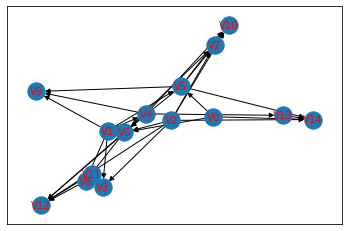

In [105]:
# Seed for reproducibility
import random
random.seed(42)
np.random.seed(42)

# Synthetic data generation
generator = AcyclicGraphGenerator('linear', npoints=5000, nodes=15)
data, graph = generator.generate()
# generator.to_csv('generated_graph')

nx.draw_networkx(graph, font_size=10, font_color='r')

100%|██████████| 13/13 [00:02<00:00,  4.65it/s, epoch=0, loss=4.84]


--- Execution time : 43.2 seconds ---


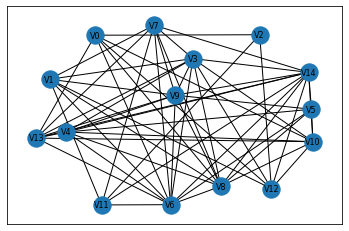

In [106]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn_s = FSGNN(train_epochs=10, test_epochs=3, lr=0.01,l1=0.1, batch_size=100,verbose=True,nruns=1)

start_time = time.time()
ugraph_s = Fsgnn_s.predict(data, threshold=2e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph_s, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
# pd.DataFrame(list(ugraph_s.edges(data='weight')))

100%|██████████| 15/15 [00:03<00:00,  4.62it/s, idx=0, score=0.354]


--- Execution time : 408. seconds ---


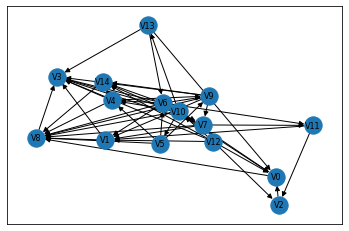

In [107]:
# Pairwise orientation of the edges of the graph
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn_s = GNN(nruns=1, train_epochs=10, test_epochs=5,lr=0.01, batch_size=100,verbose=True)
ograph_s = dagify_min_edge(gnn_s.orient_graph(data, ugraph_s))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ograph_s, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
# pd.DataFrame(list(ograph_s.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

100%|██████████| 13/13 [00:07<00:00,  1.70it/s, idx=0, loss=1.35]


--- Execution time : 350. seconds ---


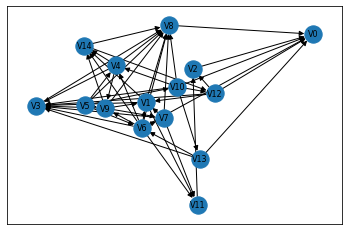

,Cause,Effect,Score
0,V2,V0,0.041788
1,V6,V3,0.040854
2,V6,V4,0.027315
3,V6,V7,0.003095
4,V6,V9,0.013938
5,V6,V11,0.057375
6,V6,V14,0.004440
7,V6,V8,0.029073
8,V6,V1,0.016963
9,V6,V0,0.003362


In [108]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=1, train_epochs=10, test_epochs=3,batch_size=100,verbose=True)
start_time = time.time()
dgraph_s = Cgnn.orient_directed_graph(data,ograph_s)
# dgraph = Cgnn.predict(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph_s, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph_s.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

CGNN Metrics:
Structural hamming distance: 64
Area under the curve: 0.197


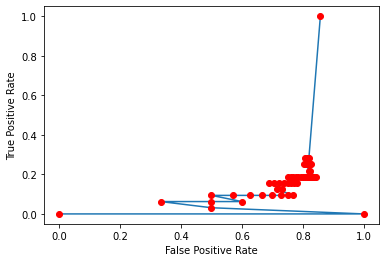

In [109]:
# threshold 2e-7
# Metrics for CGNN
shd = cdt.metrics.SHD(graph, dgraph_s)
auc, roc = cdt.metrics.precision_recall(graph, dgraph_s)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("CGNN Metrics:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [112]:
# exported to obtain SID on R 
nx.write_gpickle(dgraph_s, "cgnn.gpickle")

100%|██████████| 25/25 [01:29<00:00,  3.58s/it, disc=0.0107, gen=-.91, regul_loss=0.414, tot=5.24e+5]


--- Execution time : 462. seconds ---


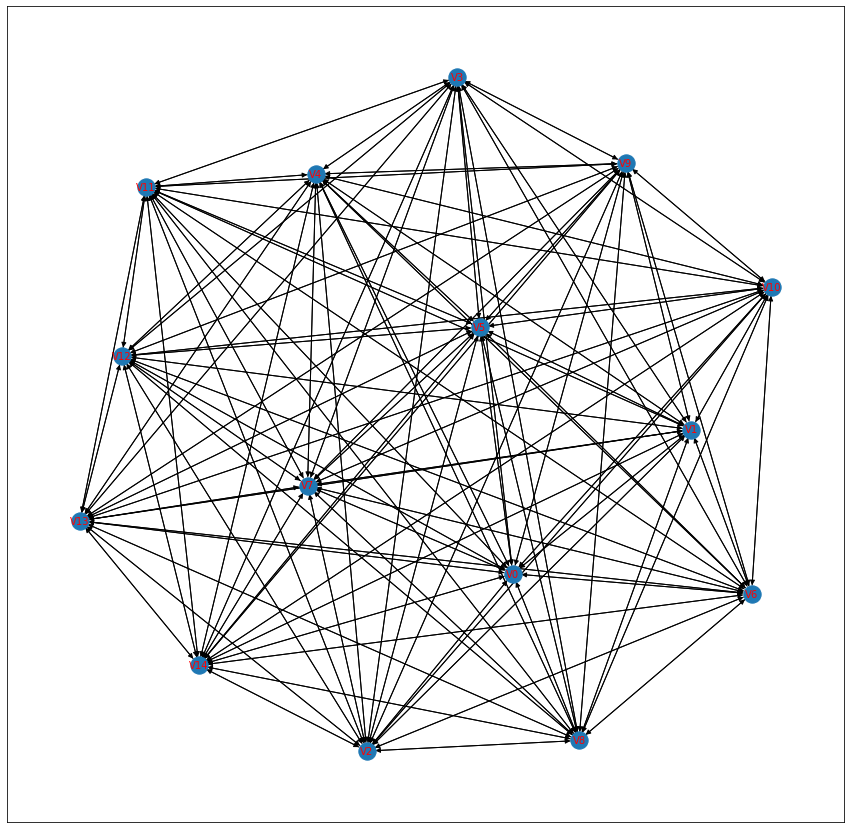

In [110]:
# Finding the structure of the graph
# from cdt.independence.graph 

# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=5, train_epochs=20, test_epochs=5,verbose=True)


start_time = time.time()
predict_s = model_sam.predict(data)
# predict.

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict_s, font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()

SAM Metrics:
Structural hamming distance: 178
Area under the curve: 0.230


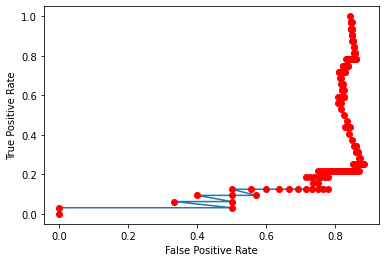

In [111]:
# threshold 2e-7
# Metrics for SAM
shd = cdt.metrics.SHD(graph, predict_s)
auc, roc = cdt.metrics.precision_recall(graph, predict_s)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("SAM Metrics:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:
# exported to obtain SID on R 
nx.write_gpickle(predict_s, "sam1.gpickle")

# Thyroid Dataset

In [ ]:
# fh = FileHandler()
df = pd.read_csv("/content/Causal-Discovery-Algorithms-on-Medical-Data/datasets/thyroid.csv")
df.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
# Binarize textual data
df.replace({'F': 0., 'f': 0., 'M': 1., 't': 1., "P": 1., "N": 0.}, inplace=True)

# Categorical encoding for "referreal source" column
df.replace({'SVHC': 0, 'SVI': 1, 'STMW': 2, 'SVHD': 3, 'other': -1}, inplace=True)

# "?" values have to removed. They cannot be mapped to np.nan because the algorithm won't work. I decided to map those values to 0, but we should discuss this choice
df.replace({'?': 0.}, inplace=True)

# There are no measurements for TBG, can be dropped
df.drop(columns=["TBG", "TBG measured"], inplace=True)

In [ ]:
df.rename(columns = {"binaryClass":"diagnosis"},inplace=True)

In [ ]:
features = df.iloc[:, :27]
features

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,1.0,2.5,1.0,125,1.0,1.14,1.0,109,0
1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.1,1.0,2,1.0,102,0.0,0.0,0.0,0.0,-1
2,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,0.0,0.0,1.0,109,1.0,0.91,1.0,120,-1
3,70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.0,1.9,1.0,175,0.0,0.0,0.0,0.0,-1
4,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.0,1.2,1.0,61,1.0,0.87,1.0,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3768,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,2.1,1.0,124,1.0,1.08,1.0,114,1
3769,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.1,1.0,1.8,1.0,112,1.0,1.07,1.0,105,-1
3770,72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,1.0,2,1.0,82,1.0,0.94,1.0,87,1


In [ ]:
scaler = StandardScaler()
thyroid_df = pd.DataFrame(scaler.fit_transform(features.to_numpy()), columns=features.columns)

In [ ]:
thyroid_df.insert(loc=0, column='diagnosis', value=df['diagnosis'])
thyroid_df

,diagnosis,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
0,1.0,-0.533513,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.140943,0.506041,0.817848,0.255413,0.539971,0.338124,0.697672,0.337150,0.213911,0.216665
1,1.0,-1.429156,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.020960,0.506041,0.361965,0.255413,0.007277,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
2,1.0,-0.284723,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.154655,-1.976125,-1.461567,0.255413,0.169402,0.338124,0.048242,0.337150,0.453874,-0.772753
3,1.0,0.909468,-0.658954,2.670077,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.189793,0.506041,0.270789,0.255413,1.698002,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
4,1.0,0.909468,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.165796,0.506041,-0.367448,0.255413,-0.942308,0.338124,-0.064702,0.337150,-0.636868,1.206082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1.0,-1.080850,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.196649,-1.976125,-1.461567,-3.915227,-2.355105,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
3768,1.0,0.809952,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.153798,0.506041,0.453142,0.255413,0.516811,0.338124,0.528256,0.337150,0.322985,1.206082
3769,1.0,1.108500,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,0.021890,0.506041,0.179612,0.255413,0.238883,0.338124,0.500020,0.337150,0.126652,-0.772753
3770,1.0,1.008984,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,...,-0.166653,0.506041,0.361965,0.255413,-0.455935,0.338124,0.132951,0.337150,-0.266016,1.206082


In [ ]:
newdf = thyroid_df.iloc[:, :18]

100%|██████████| 13/13 [00:01<00:00,  7.29it/s, epoch=0, loss=5.5]


--- Execution time : 32.9 seconds ---


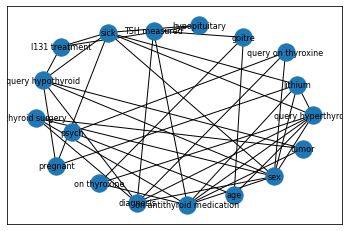

,0,1,2
0,diagnosis,sex,1.149763e-05
1,diagnosis,query on thyroxine,2.080722e-07
2,diagnosis,thyroid surgery,2.154067e-06
3,diagnosis,query hypothyroid,7.598333e-07
4,diagnosis,query hyperthyroid,3.730976e-07
5,diagnosis,TSH measured,2.997750e-07
6,sex,query on thyroxine,1.200391e-06
7,sex,on antithyroid medication,7.718364e-07
8,sex,sick,1.656055e-06
9,sex,thyroid surgery,6.898119e-07


In [ ]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=10, test_epochs=3, lr=0.01,l1=0.1, batch_size=100,verbose=True,nruns=1)

start_time = time.time()
ugraph = Fsgnn.predict(newdf, threshold=2e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

100%|██████████| 15/15 [00:01<00:00,  7.67it/s, idx=0, score=1.66]


--- Execution time : 160. seconds ---


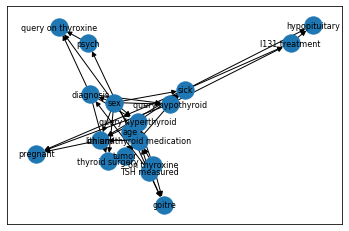

,Cause,Effect,Score
0,sex,diagnosis,0.699184
1,sex,query on thyroxine,0.978359
2,sex,on antithyroid medication,0.979785
3,sex,sick,0.848247
4,sex,thyroid surgery,0.975989
5,sex,query hypothyroid,0.785659
6,sex,query hyperthyroid,0.749668
7,sex,lithium,0.942821
8,diagnosis,query on thyroxine,0.886212
9,diagnosis,thyroid surgery,0.866239


In [ ]:
# Pairwise orientation of the edges of the graph
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn = GNN(nruns=1, train_epochs=10, test_epochs=5,lr=0.01, batch_size=100,verbose=True)
ograph = dagify_min_edge(gnn.orient_graph(newdf, ugraph))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ograph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

100%|██████████| 13/13 [00:05<00:00,  2.25it/s, idx=0, loss=1.25]


--- Execution time : 198. seconds ---


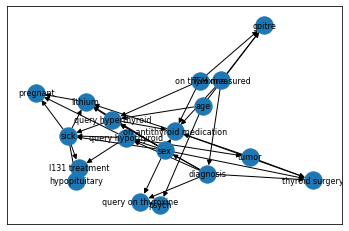

,Cause,Effect,Score
0,sex,query on thyroxine,0.978359
1,sex,on antithyroid medication,0.979785
2,sex,sick,0.848247
3,sex,thyroid surgery,0.975989
4,sex,query hypothyroid,0.785659
5,sex,query hyperthyroid,0.749668
6,sex,lithium,0.942821
7,diagnosis,query on thyroxine,0.886212
8,diagnosis,thyroid surgery,0.866239
9,diagnosis,query hypothyroid,0.194447


In [ ]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=1, train_epochs=10, test_epochs=3,batch_size=100,verbose=True)
start_time = time.time()
dgraph = Cgnn.orient_directed_graph(newdf,ograph)
# dgraph = Cgnn.predict(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

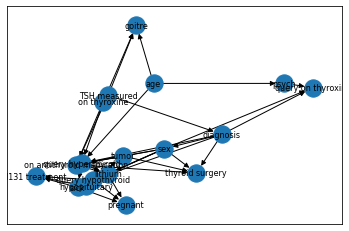

In [ ]:
nx.draw_networkx(dgraph, font_size=8,with_labels=True)

In [ ]:
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score']).sort_values(ascending=False,by="Score")

,Cause,Effect,Score
1,sex,on antithyroid medication,0.979785
0,sex,query on thyroxine,0.978359
3,sex,thyroid surgery,0.975989
34,age,goitre,0.955547
18,query hyperthyroid,lithium,0.950334
6,sex,lithium,0.942821
37,on thyroxine,goitre,0.930532
20,TSH measured,on antithyroid medication,0.930369
21,TSH measured,goitre,0.928215
26,sick,lithium,0.924294


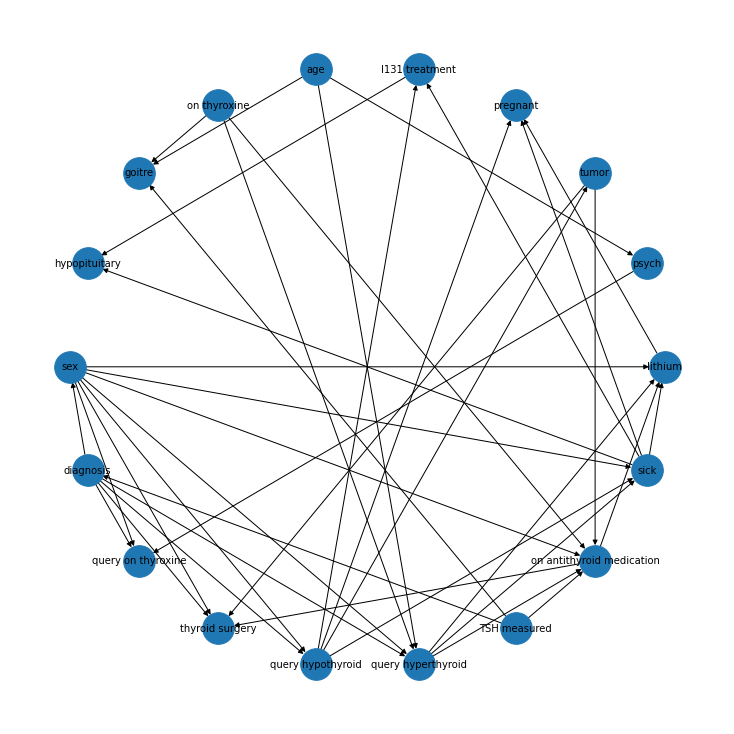

In [ ]:
plt.figure(figsize=[10,10])
nx.draw_shell(dgraph, font_size=10,node_size=1000 ,with_labels=True)

In [ ]:
# Finding the structure of the graph
# from cdt.independence.graph 

# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=5, train_epochs=20, test_epochs=5,verbose=True)


start_time = time.time()
predict = model_sam.predict(newdf)
# predict.

In [102]:
# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(dagify_min_edge(predict), font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()

KeyboardInterrupt: ignored

<Figure size 1080x1080 with 0 Axes>

# Breast Cancer Dataset


In [48]:
breast_cancer_df = pd.read_csv("/content/Causal-Discovery-Algorithms-on-Medical-Data/datasets/breast_cancer.csv")
breast_cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
# Convert column "diagnosis" from categorical to binary
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "M", 'diagnosis'] = 1.0
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "B", 'diagnosis'] = 0.0

# Drop colum "Unnamed: 32" (contains only nan values)
breast_cancer_df.drop(columns=["Unnamed: 32", 'id'], inplace=True)
#target_bc = breast_cancer_df.pop('diagnosis').to_numpy().astype(int)

In [52]:
corr_df = pd.DataFrame(scaler.fit_transform(breast_cancer_df.to_numpy()), columns=breast_cancer_df.columns)
corr_df = pd.DataFrame(corr_df.iloc[:,1:].corrwith(corr_df['diagnosis'])).sort_values(by=0, ascending=False)
corr_df.T

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se,fractal_dimension_se,symmetry_se,texture_se,fractal_dimension_mean,smoothness_se
0,0.793566,0.782914,0.776614,0.776454,0.742636,0.733825,0.730029,0.708984,0.69636,0.65961,...,0.35856,0.330499,0.323872,0.292999,0.25373,0.077972,-0.006522,-0.008303,-0.012838,-0.067016


In [53]:
scaler = StandardScaler()
# diagnosis = breast_cancer_df["diagnosis"]
breast_cancer_df1 = breast_cancer_df.iloc[:,1:]
breast_cancer_df1 = pd.DataFrame(scaler.fit_transform(breast_cancer_df1.to_numpy()), columns=breast_cancer_df1.columns)

In [62]:
breast_cancer_df1 = breast_cancer_df1[list(corr_df.T.columns)].iloc[:, :10]

In [63]:
breast_cancer_df1.insert(loc=0, column='diagnosis', value=breast_cancer_df['diagnosis'])
breast_cancer_df1

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst
0,1.0,2.296076,2.303601,2.532475,1.886690,1.269934,2.001237,1.097064,0.984375,2.652874,2.109526
1,1.0,1.087084,1.535126,0.548144,1.805927,1.685955,1.890489,1.829821,1.908708,-0.023846,-0.146749
2,1.0,1.955000,1.347475,2.037231,1.511870,1.566503,1.456285,1.579888,1.558884,1.363478,0.854974
3,1.0,2.175786,-0.249939,1.451707,-0.281464,-0.592687,-0.550021,-0.768909,-0.764464,1.915897,1.989588
4,1.0,0.729259,1.338539,1.428493,1.298575,1.776573,1.220724,1.750297,1.826229,1.371011,0.613179
...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,1.629151,1.752563,2.320965,1.901185,2.060786,2.015301,2.110995,2.343856,1.947285,0.664512
565,1.0,0.733827,1.421940,1.263669,1.536720,1.615931,1.494959,1.704854,1.723842,0.693043,0.236573
566,1.0,0.414069,0.579001,0.105777,0.561361,0.672676,0.427906,0.702284,0.577953,0.046588,0.326767
567,1.0,2.289985,2.303601,2.658866,1.961239,1.982524,1.653171,1.838341,1.735218,3.296944,3.197605


100%|██████████| 13/13 [00:00<00:00, 37.83it/s, epoch=0, loss=4.3]


--- Execution time : 4.27 seconds ---


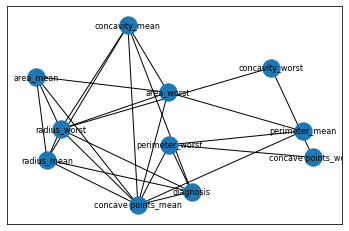

,0,1,2
0,diagnosis,perimeter_worst,0.011769
1,diagnosis,concave points_mean,0.000787
2,diagnosis,radius_worst,0.000578
3,diagnosis,radius_mean,0.002350
4,diagnosis,concavity_mean,0.001180
5,perimeter_worst,concave points_worst,0.001718
6,perimeter_worst,concave points_mean,0.001218
7,perimeter_worst,perimeter_mean,0.004072
8,concave points_mean,radius_worst,0.002802
9,concave points_mean,perimeter_mean,0.003274


In [64]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn_b = FSGNN(train_epochs=10, test_epochs=3, lr=0.01,l1=0.1, batch_size=100,verbose=True,nruns=1)

start_time = time.time()
ugraph_b = Fsgnn_b.predict(breast_cancer_df1, threshold=2e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph_b, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph_b.edges(data='weight')))

100%|██████████| 15/15 [00:00<00:00, 47.90it/s, idx=0, score=0.747]


--- Execution time : 22.7 seconds ---


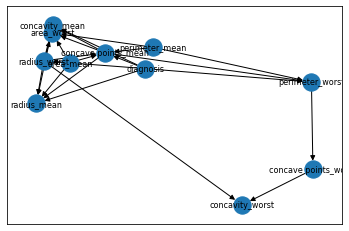

,Cause,Effect,Score
0,diagnosis,perimeter_worst,0.652235
1,diagnosis,concave points_mean,0.510362
2,diagnosis,radius_worst,0.551220
3,diagnosis,radius_mean,0.475253
4,diagnosis,concavity_mean,0.623641
5,perimeter_worst,concave points_worst,0.050748
6,concave points_mean,perimeter_worst,0.023985
7,concave points_mean,area_worst,0.104420
8,concave points_mean,concavity_mean,0.148979
9,concave points_mean,radius_mean,0.071152


In [67]:
# Pairwise orientation of the edges of the graph
from cdt.causality.pairwise import GNN
from cdt.utils.graph import dagify_min_edge
start_time = time.time()

gnn_b = GNN(nruns=1, train_epochs=10, test_epochs=5,lr=0.01, batch_size=100,verbose=True)
ograph_b = dagify_min_edge(gnn_b.orient_graph(breast_cancer_df1, ugraph_b))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ograph_b, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ograph_b.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

100%|██████████| 13/13 [00:00<00:00, 18.27it/s, idx=0, loss=1.55]


--- Execution time : 24.5 seconds ---


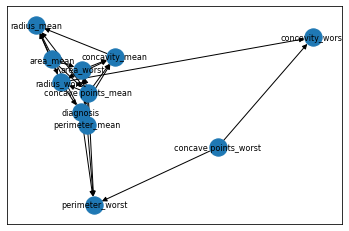

,Cause,Effect,Score
0,diagnosis,perimeter_worst,0.652235
1,diagnosis,radius_mean,0.475253
2,diagnosis,concavity_mean,0.623641
3,concave points_mean,perimeter_worst,0.023985
4,concave points_mean,area_worst,0.104420
5,concave points_mean,concavity_mean,0.148979
6,concave points_mean,radius_mean,0.071152
7,concave points_mean,diagnosis,0.510362
8,concave points_mean,radius_worst,0.010047
9,concave points_mean,perimeter_mean,0.054878


In [68]:
from cdt.causality.graph import CGNN
Cgnn_b = CGNN(nruns=1, train_epochs=10, test_epochs=3,batch_size=100,verbose=True)
start_time = time.time()
dgraph_b = Cgnn_b.orient_directed_graph(breast_cancer_df1,ograph_b)
# dgraph = Cgnn.predict(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph_b, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph_b.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

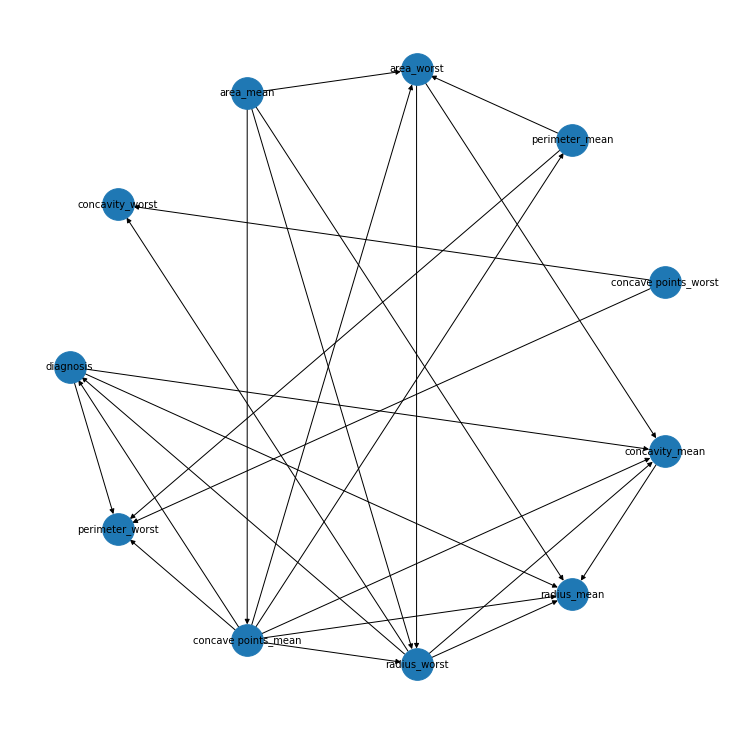

In [70]:
plt.figure(figsize=[10,10])
nx.draw_shell(dgraph_b, font_size=10,node_size=1000 ,with_labels=True)

In [69]:
pd.DataFrame(list(dgraph_b.edges(data='weight')), columns=['Cause', 'Effect', 'Score']).sort_values(ascending=False,by="Score")

,Cause,Effect,Score
20,area_worst,radius_worst,0.720582
0,diagnosis,perimeter_worst,0.652235
2,diagnosis,concavity_mean,0.623641
13,radius_worst,diagnosis,0.551220
7,concave points_mean,diagnosis,0.510362
1,diagnosis,radius_mean,0.475253
18,perimeter_mean,area_worst,0.444406
24,area_mean,area_worst,0.313518
14,concavity_mean,radius_mean,0.223320
21,area_mean,concave points_mean,0.208604


100%|██████████| 25/25 [00:08<00:00,  2.96it/s, disc=0.0176, gen=-.836, regul_loss=1.88, tot=8.31e+3]


--- Execution time : 45.3 seconds ---


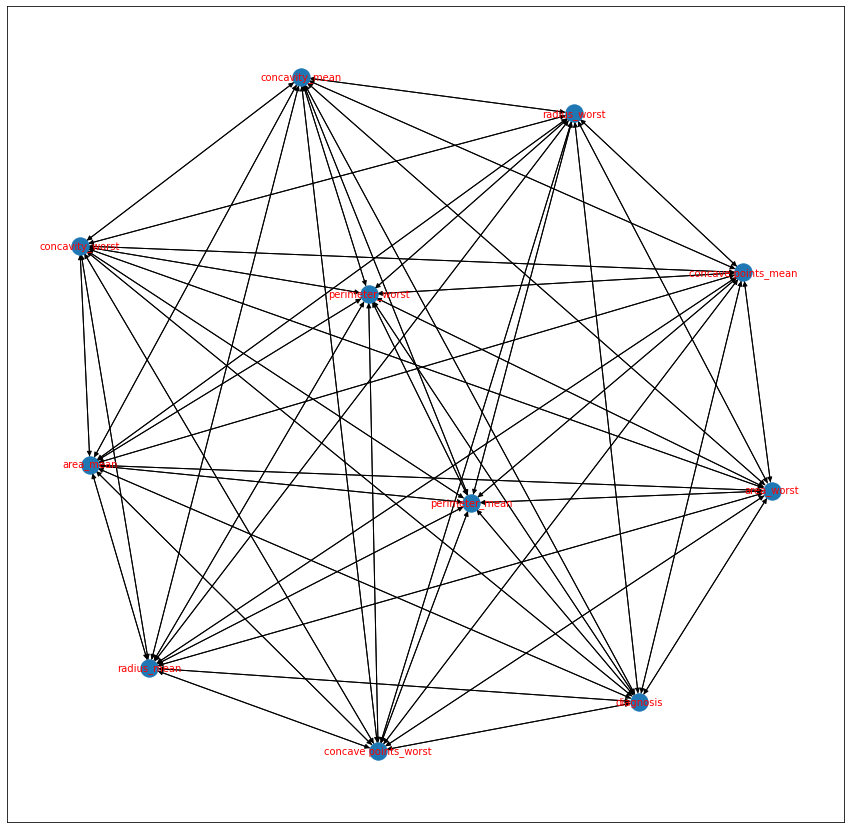

In [97]:
# Finding the structure of the graph
# from cdt.independence.graph 

# SAM Algorithm
model_sam_b = cdt.causality.graph.SAM(nruns=5, train_epochs=20, test_epochs=5,verbose=True)


start_time = time.time()
predict_b = model_sam_b.predict(breast_cancer_df1)
# predict.

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict_b, font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()

In [ ]:
# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(dagify_min_edge(predict_b), font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()

# Cardiovascular Dataset

In [85]:
cardio_df = pd.read_csv("/content/Causal-Discovery-Algorithms-on-Medical-Data/datasets/cardio.csv", delimiter=";", index_col='id')

In [91]:
cardio_df1 =  cardio_df
cardio_df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [92]:
scaler = StandardScaler()
cardio_df1 = pd.DataFrame(scaler.fit_transform(cardio_df1.to_numpy()), columns=cardio_df1.columns)


In [94]:
# cardio_df1.insert(loc=0, column='cardio', value=cardio_df['cardio'])
cardio_df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,-0.9994
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.395720,-0.310879,-0.238384,0.494167,1.0006
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.395720,-0.310879,-0.238384,-2.023607,1.0006
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,1.0006
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607,-0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092762,1.364055,0.443452,0.124642,-0.057251,-0.088238,-0.539322,-0.395720,3.216684,-0.238384,0.494167,-0.9994
69996,1.269492,-0.733108,-0.774565,3.597913,0.072610,-0.035180,0.930735,1.351719,-0.310879,-0.238384,0.494167,1.0006
69997,-0.163286,1.364055,2.270477,2.139139,0.332333,-0.035180,2.400793,-0.395720,-0.310879,4.194906,-2.023607,1.0006
69998,1.200589,-0.733108,-0.165556,-0.153219,0.040145,-0.088238,-0.539322,1.351719,-0.310879,-0.238384,-2.023607,1.0006


100%|██████████| 13/13 [00:42<00:00,  3.26s/it, epoch=0, loss=6.35]


--- Execution time : 464. seconds ---


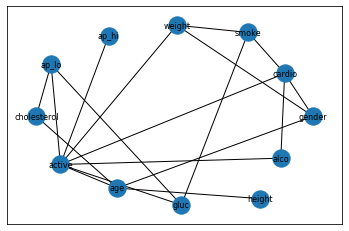

In [98]:
# Finding the structure of the graph
Fsgnn_c = FSGNN(train_epochs=10, test_epochs=3, lr=0.01,l1=0.1, batch_size=100,verbose=True,nruns=1)

start_time = time.time()
ugraph_c = Fsgnn_c.predict(cardio_df1, threshold=2e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph_c, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
# pd.DataFrame(list(ugraph_c.edges(data='weight')))

100%|██████████| 15/15 [00:35<00:00,  2.38s/it, idx=0, score=0.629]


--- Execution time : 1596 seconds ---


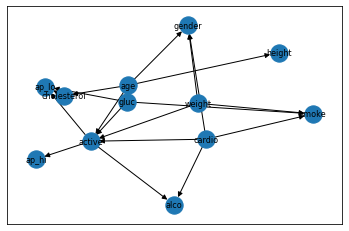

In [99]:
start_time = time.time()

gnn_c = GNN(nruns=1, train_epochs=10, test_epochs=5,lr=0.01, batch_size=100,verbose=True)
ograph_c = dagify_min_edge(gnn_c.orient_graph(cardio_df1, ugraph_c))
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ograph_c, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
# pd.DataFrame(list(ograph_c.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

100%|██████████| 13/13 [01:33<00:00,  7.17s/it, idx=0, loss=1.21]


--- Execution time : 3655 seconds ---


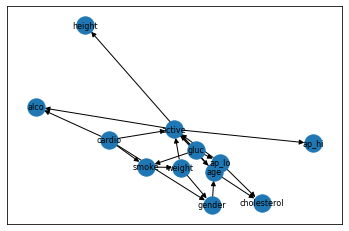

,Cause,Effect,Score
0,age,height,0.023278
1,age,cholesterol,0.264514
2,gender,age,0.270977
3,active,ap_hi,0.439727
4,active,alco,0.482349
5,active,age,0.351819
6,weight,gender,0.166818
7,weight,active,0.282942
8,cardio,gender,0.133962
9,cardio,active,0.214419


In [100]:
Cgnn_c = CGNN(nruns=1, train_epochs=10, test_epochs=3,batch_size=100,verbose=True)
start_time = time.time()
dgraph_c = Cgnn_c.orient_directed_graph(cardio_df1,ograph_c)
# dgraph = Cgnn.predict(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph_c, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph_c.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

In [ ]:
pd.DataFrame(list(dgraph_c.edges(data='weight')), columns=['Cause', 'Effect', 'Score']).sort_values(ascending=False,by="Score")

100%|██████████| 25/25 [16:59<00:00, 40.76s/it, disc=0.0129, gen=-.865, regul_loss=0.0186, tot=2.41e+4]


--- Execution time : 5056 seconds ---


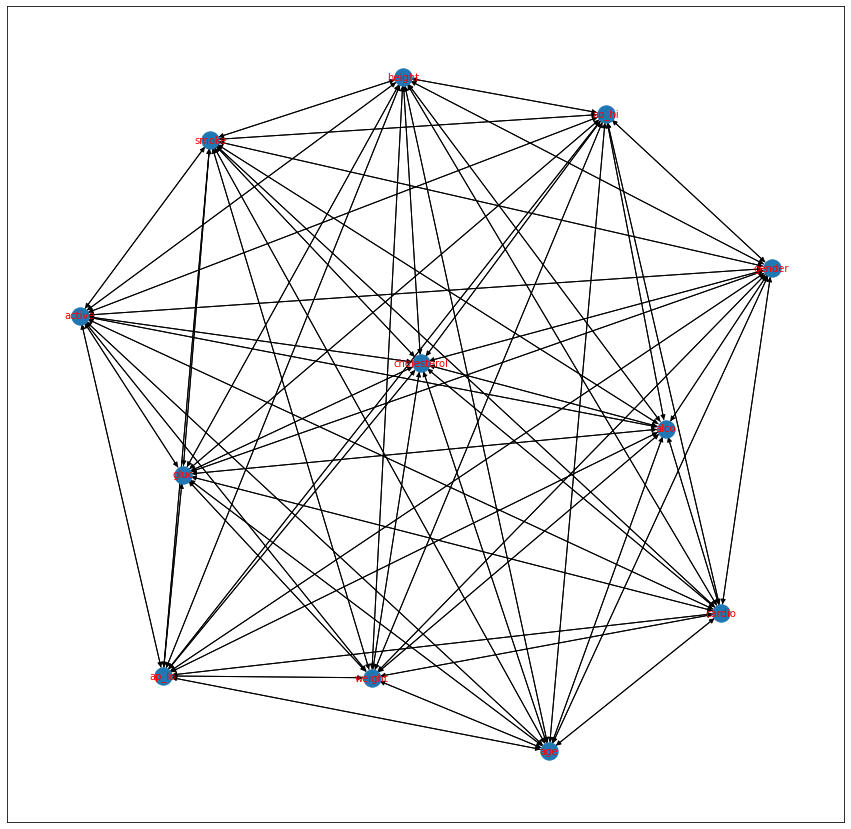

In [101]:
# SAM Algorithm
model_sam_c = cdt.causality.graph.SAM(nruns=5, train_epochs=20, test_epochs=5,verbose=True)


start_time = time.time()
predict_c = model_sam_c.predict(cardio_df1)
# predict.

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict_c, font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()

In [ ]:
# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(dagify_min_edge(predict_c), font_size=10, font_color='r')
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
plt.show()